In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import seaborn as sns

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 5s 3us/step


In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [6]:
type(train_data)

numpy.ndarray

In [9]:
def count_vectorizer(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
x_train = count_vectorizer(train_data)
x_test = count_vectorizer(test_data)

#one hot encoding of the 46 possible labels
def one_hot_encoding(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = one_hot_encoding(train_labels)
y_test = one_hot_encoding(test_labels)

In [11]:
x_train.shape

(8982, 10000)

In [12]:
x_test.shape

(2246, 10000)

In [13]:
y_train.shape

(8982, 46)

In [14]:
y_test.shape

(2246, 46)

In [15]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
#keras has a util one hot encode function for categorical labels
#import tensorflow.keras.utils.to_categorical
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)
#returns same encoding as our manual one_hot_encoding function

In [24]:
#since we have 46 possible output categories(labels)
#our hidden layers should contain more neurons to prevent information
#bottlenecks

#build a sequential model with an input layer that has 10000 neurons
#since each review is a vectorized array len=10000
#2 hidden layers each w/ 64 neurons and use ReLU activation function
#output layer has 46 neurons and use a softmax activation function
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#for each input we output a 46 dimensional vector where each component i 
#represents the networks prediction probability that sample input belongs 
#to category i, all components of the output vector sum to 1.0


#since we have multiclass output labels, use categorical_crossentropy as loss
#crossentropy is a measure between the models predicted probability distribution
#(last layer) against the true probability distribution
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [26]:
#model.fit() returns a history object containing information for each epoch
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 60ms/step - loss: 2.5793 - accuracy: 0.5287 - val_loss: 1.7307 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4048 - accuracy: 0.7082 - val_loss: 1.2998 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0399 - accuracy: 0.7764 - val_loss: 1.1362 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8221 - accuracy: 0.8222 - val_loss: 1.0331 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6618 - accuracy: 0.8582 - val_loss: 0.9755 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5291 - accuracy: 0.8901 - val_loss: 0.9355 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4352 - accuracy: 0.9045 - val_loss: 0.8956 - val_accuracy: 0.8240
Epoch 8/20
16

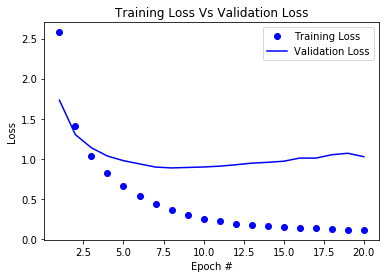

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training Loss Vs Validation Loss')
plt.legend()
plt.show()

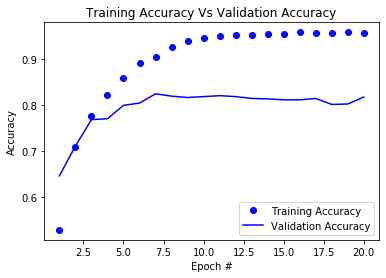

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, 21)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Validation Accuracy')
plt.legend()
plt.show()

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
#our model begins to overfit after 9 epochs, only 9 iterations over all training
#data is necessary to mitigate overfitting 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 48ms/step - loss: 2.5367 - accuracy: 0.5173
Epoch 2/9
18/18 [==============================] - 1s 52ms/step - loss: 1.3506 - accuracy: 0.7214
Epoch 3/9
18/18 [==============================] - 1s 62ms/step - loss: 1.0053 - accuracy: 0.7927
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7919 - accuracy: 0.8339
Epoch 5/9
18/18 [==============================] - 1s 39ms/step - loss: 0.6306 - accuracy: 0.8653
Epoch 6/9
18/18 [==============================] - 1s 49ms/step - loss: 0.5030 - accuracy: 0.8962
Epoch 7/9
18/18 [==============================] - 1s 46ms/step - loss: 0.4009 - accuracy: 0.9178
Epoch 8/9
18/18 [==============================] - 1s 38ms/step - loss: 0.3286 - accuracy: 0.9300
Epoch 9/9
18/18 [==============================] - 1s 36ms/step - loss: 0.2737 - accuracy: 0.9364


In [34]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9481 - accuracy: 0.7930


In [35]:
#generating predictions with our trained model
predictions = model.predict(x_test)
predictions[0]

array([1.18234748e-05, 1.71479289e-04, 8.68429430e-04, 8.95581663e-01,
       8.45817626e-02, 6.02618320e-06, 2.09662874e-04, 1.15645576e-04,
       3.14628845e-03, 9.70451292e-05, 1.72518667e-05, 4.93066211e-04,
       8.02752766e-05, 3.40496277e-04, 1.48274354e-04, 3.79851554e-05,
       6.23152917e-03, 1.11464364e-03, 1.26111345e-05, 5.87454124e-04,
       1.33160502e-03, 2.39518777e-04, 2.06597062e-04, 9.00590167e-05,
       2.68771226e-04, 1.59334333e-04, 6.73716349e-05, 3.91168542e-05,
       6.61907106e-05, 1.91900850e-04, 8.19803608e-05, 1.31698078e-04,
       3.61456710e-04, 1.53593763e-04, 2.19613848e-05, 7.95081942e-05,
       1.24006896e-04, 6.98962467e-05, 9.66008956e-05, 1.87325128e-03,
       2.09542031e-05, 2.01197472e-04, 4.17321426e-05, 3.75401432e-05,
       1.13584501e-05, 1.79335853e-04], dtype=float32)

In [36]:
#to get the class witht he maximal probability use np,argmax
np.argmax(predictions[0])

3